# Week 6 - An introduction to Machine Learning (PART 1)

### Agenda

1. Motivation
2. Aims
3. Theoretical part
3. Work with datasets

Time: 60min

The pace of the meeting is expected as quite intensive due to wide scope of topics.

Please write questions on the chat.

### Motivation

> The regression techniques from previous lectures depend upon making some (often stringent) assumptions about statistical properties of the underlying mechanisms of data generation. For example, the error bars on standard linear regression coefficients are only valid when, amongst other things, our residual are normally distributed .

> In one view, Machine Learning is a toolkit of techniques that allow us to describe data and make predictions, while making fewer assumptions about the statistical properties of our data. Instead, we squeeze the most out of the data we've already got, to make assertions that will (hopefully!) generalise to data yet unseen.

### Aims

#### This week

- Theoretical lecture: 
  - comparing ML with statistical model
  - types of problems where ML is helpful
     - comparison of regression, classification and clustering
  - challenges in the field of machine learning
  - stages of creating the ML model
  - introduction to Scikit-learn package
  - other Python libraries for Machine Learning basics (PyTorch, TensorFlow, Keras)
- Recreate the simple and multivariate regressions based on the [Breast Cancer Gene Expression Profiles (METABRIC)](https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric)
- Generate some intuition for the properties of regression and introduction of CART algorithm using a wages dataset from the US Census Bureau's [1985 Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps/library/publications.1985.html)

### Next week
- Exploration of our knowledge about classifiers - Decision Trees and Random Forests based on the set [Digits dataset](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)
- How we can be more systematic about how we pick the final model
- Introduction to the homework with a hands-on with data based on a [nature machine intelligence](https://www.nature.com/natmachintell/) paper, ["An interpretable mortality prediction model for COVID-19 patients"](https://www.nature.com/articles/s42256-020-0180-7).

- *If we have enough time - talk about key differences between Machine Learning, Deep Learning and Artificial Intelligence buzzwords

### Learning objectives

- Acquire a basic familiarity with the jargon and concepts of the Machine Learning in practical terms
- Implement an end-to-end machine learning classification model using the Scikit-learn framework

### Topics not covered by this module
- Clustering algorithms (unsupervised learning)
- Reduction of data dimensionality

# Lecture

### ML vs. statistical model - what is the difference?

When it comes to statistics and ML, ML would not exist without statistics. Comparing ML and statistical models is a bit more difficult. Which one we use depends a lot on what the purpose is. If you simply want to create an algorithm that can predict asset prices with high accuracy or use data to determine it, ML is likely to be the better approach. If we are trying to prove the relationship between variables or draw conclusions from the data, then a statistical model is likely to be the better approach. 
 
However, if we don't have a strong background in statistical knowledge, we can still study and use ML. The high level of abstraction offered by ML programming libraries makes it quite easy to use without being an expert in the field. However, we still need a minimal understanding of basic statistical concepts to prevent overfitting of models.

### 4 types of problems that machine learning can best solve

1. problems that require frequent algorithm tuning or the use of long lists of rules - often one machine learning algorithm simplifies the application and improves its speed compared to the traditional approach

2. complex problems that cannot be solved by traditional methods - the best machine learning algorithms are able to find a solution

3. changing environments - the machine learning mechanism can adapt to new data

4. helping people to analyze complex issues and huge amounts of data; teaching people (e.g. data mining)

### Challenges

The main challenges in the field of ML are: 
- lack of data
- low data quality
- unrepresentative data
- unhelpful features
- over-simplified under-training models
- overly complex models that tend to overtrain

### Steps during creation of a ML project:
1. identify the problem and analyze it in a broader perspective
2. collect (i.e. buy) and prepare data
3. perform data analysis to detect additional information (including visualizations)
4. prepare of data in a way that shows the patterns used by Machine Learning algorithms (i.e. standarization, normalization)
5. check multiple models and shortlist the most efficient ones
6. perform fine-tuning of models / hyperparameter tuning and combinine them to achieve even better results (ensemble methods)
7. present the solution / prediction
8. execute the maintenance of the system

### Introduction to Scikit-learn package

[Guide with some of the main features that scikit-learn provides](https://scikit-learn.org/stable/getting_started.html)

### Other popular Python libraries for Machine Learning

- PyTorch
- TensorFlow

Each of these two frameworks have own syntax, they are both popular and used by many developers. TensorFlow was created by Google and came out in early 2017, while PyTorch released in 2018 is derived from Facebook. Both have continued to be developed. PyTorch is a bit more native to Python, while TensorFlow has been connected to it through Keras integration (it is a library imposed on top of TensorFlow, simplifying its API).

Which framework should you choose? It’s a subjective decision, so I will advertise mine. Due to my learning path in this area, which began with the book Deep Learning with Python written by Keras creator and Google AI researcher François Chollet referring to TensorFlow, I remained faithful to the framework I know. Additionally, if you consider the developer communitie — TensorFlow’s one is bigger. As it is with majority of programming languages, learning any framework will help you work with others faster when changing to another. Check which syntax is more pleasant for you. Especially if you are just starting with this topic, choosing one of them does not determine you.

# Work with datasets

## 0. Setup

You will need to install the [pandas](https://pandas.pydata.org/), [scikit-learn](https://scikit-learn.org/stable/), [matplotlib](https://matplotlib.org/), [plotnine](https://plotnine.readthedocs.io/en/stable/) and [xlrd](https://xlrd.readthedocs.io/en/latest/) packages to run this notebook, and you'll require Python >=3.6 (first release 2016-12-23; newest version 3.10 was published on 2021-10-04).

 To install these packages, set up the environment as shared in https://github.com/semacu/202110-data-science-python/blob/main/notebooks/week0_materials.ipynb

## 1. Linear regression

If we have a continuous variable, and we want to model its relationship with another variable, we can use simple linear regression. In linear regression we call the variable of interest the response, and the other variable the predictor. The mathematical details of linear regression are beyond the scope of this course, but in the case of simple linear regression it basically amounts to fitting a line through the data that is closest to all of the points. For example, we may want to predict survival time based on tumour size, because survival time appears to differ across the range of tumour sizes:

### Load the METABRIC dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
metabric = pd.read_csv("https://raw.githubusercontent.com/semacu/202105-data-science-python/main/data/metabric_clinical_and_expression_data.csv").dropna() # NA drop
metabric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 1 to 1664
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_ID                     1121 non-null   object 
 1   Cohort                         1121 non-null   int64  
 2   Age_at_diagnosis               1121 non-null   float64
 3   Survival_time                  1121 non-null   float64
 4   Survival_status                1121 non-null   object 
 5   Vital_status                   1121 non-null   object 
 6   Chemotherapy                   1121 non-null   object 
 7   Radiotherapy                   1121 non-null   object 
 8   Tumour_size                    1121 non-null   float64
 9   Tumour_stage                   1121 non-null   float64
 10  Neoplasm_histologic_grade      1121 non-null   float64
 11  Lymph_nodes_examined_positive  1121 non-null   int64  
 12  Lymph_node_status              1121 non-null   i

In [ ]:
metabric.describe()

,Cohort,Age_at_diagnosis,Survival_time,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Nottingham_prognostic_index,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,2.207850,60.412721,126.239518,26.094112,1.756467,2.445138,1.873327,1.626227,4.123553,5.467440,9.600854,10.770958,6.238728,6.191980,5.950108,9.530585,10.839721,11.383495
std,0.956449,13.012218,77.295543,15.102221,0.622865,0.635888,3.830332,0.739443,1.059818,3.859249,2.093524,1.317631,1.020860,0.389334,0.310095,1.468576,1.687979,1.630174
min,1.000000,21.930000,0.100000,1.000000,1.000000,1.000000,0.000000,1.000000,2.002000,1.000000,5.217238,7.281883,4.945672,5.225320,5.158697,5.401414,5.289602,5.323652
25%,1.000000,50.820000,60.133333,17.000000,1.000000,2.000000,0.000000,1.000000,3.052000,3.000000,8.205776,9.981831,5.422349,5.936286,5.730861,8.809316,10.878608,11.071585
50%,2.000000,60.930000,116.433333,22.000000,2.000000,3.000000,0.000000,1.000000,4.046000,5.000000,10.220349,10.532638,5.864217,6.176018,5.931565,9.917441,11.365047,11.857401
75%,3.000000,69.700000,188.733333,30.000000,2.000000,3.000000,2.000000,2.000000,5.046000,7.000000,11.202333,11.149977,6.902124,6.439989,6.134401,10.554370,11.749098,12.374549
max,5.000000,96.290000,337.033333,180.000000,4.000000,3.000000,41.000000,3.000000,6.360000,46.000000,13.265184,14.643900,9.932115,7.769900,8.708396,12.812082,13.127682,14.432001


In [ ]:
metabric.head()

,Patient_ID,Cohort,Age_at_diagnosis,Survival_time,Survival_status,Vital_status,Chemotherapy,Radiotherapy,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Cancer_type,ER_status,PR_status,HER2_status,HER2_status_measured_by_SNP6,PAM50,3-gene_classifier,Nottingham_prognostic_index,Cellularity,Integrative_cluster,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
1,MB-0002,1,43.19,84.633333,LIVING,Living,NO,YES,10.0,1.0,3.0,0,1,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,NEUTRAL,LumA,ER+/HER2- High Prolif,4.020,High,4ER+,2.0,10.047059,9.729606,7.505424,6.192507,5.757727,11.251197,11.843989,12.536570
4,MB-0008,1,76.97,41.366667,DECEASED,Died of Disease,YES,YES,40.0,2.0,3.0,8,3,Breast Mixed Ductal and Lobular Carcinoma,Positive,Positive,Negative,NEUTRAL,LumB,ER+/HER2- High Prolif,6.080,High,9,2.0,11.276581,9.956267,7.331223,6.337951,5.817818,9.719781,11.625006,12.161961
5,MB-0010,1,78.77,7.800000,DECEASED,Died of Disease,NO,YES,31.0,4.0,3.0,0,1,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,NEUTRAL,LumB,ER+/HER2- High Prolif,4.062,Moderate,7,4.0,11.239750,9.739996,5.954311,5.419711,6.123056,9.787085,12.142178,11.433164
8,MB-0028,1,86.41,36.566667,DECEASED,Died of Other Causes,NO,YES,16.0,2.0,3.0,1,2,Breast Invasive Ductal Carcinoma,Positive,Negative,Negative,GAIN,LumB,ER+/HER2- High Prolif,5.032,Moderate,9,4.0,12.521038,10.678267,5.325554,6.220372,6.250678,10.260059,12.148375,10.936002
9,MB-0035,1,84.22,36.266667,DECEASED,Died of Disease,NO,NO,28.0,2.0,2.0,0,1,Breast Invasive Lobular Carcinoma,Positive,Negative,Negative,LOSS,Her2,ER+/HER2- High Prolif,3.056,High,3,5.0,7.536847,11.514514,5.587666,6.411477,5.988243,10.212610,12.804542,13.474571


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


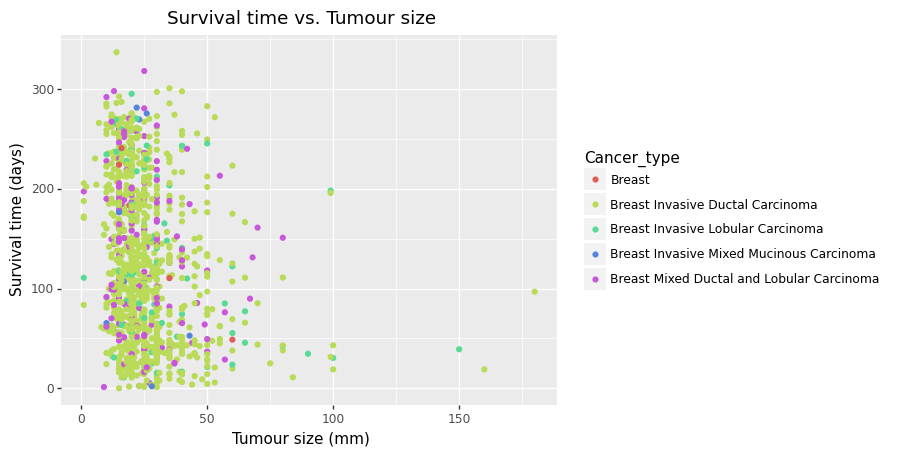

<ggplot: (8767621869041)>

In [ ]:
import plotnine as p9

metabric_p9_plot = (p9.ggplot(metabric, 
                             p9.aes(x="Tumour_size", 
                                    y="Survival_time", 
                                    colour="Cancer_type")) +  
                    p9.geom_point() +  
                    p9.ggtitle("Survival time vs. Tumour size") +  
                    p9.xlab("Tumour size (mm)") + 
                    p9.ylab("Survival time (days)"))

metabric_p9_plot # let's see the arguments of interest to us (coloring by type of cancer is not, in this case, information for the basic one-argument model)

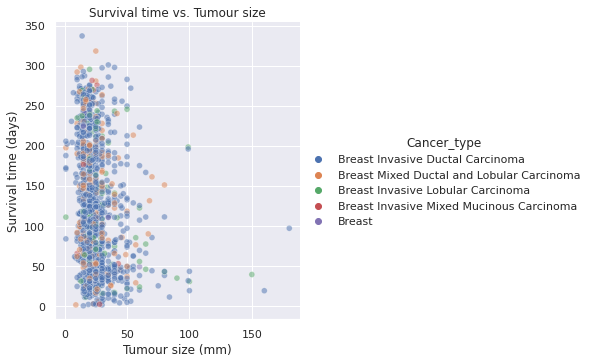

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

sns.relplot(data=metabric, 
            x="Tumour_size", 
            y="Survival_time", 
            hue="Cancer_type",
            alpha=.5).set(title="Survival time vs. Tumour size",
                          xlabel="Tumour size (mm)",
                          ylabel="Survival time (days)")

In [ ]:
import plotly.express as px
fig = px.scatter(metabric, 
                 x="Tumour_size", 
                 y="Survival_time", 
                 title="Survival time vs. Tumour size",
                 color="Cancer_type",
                 labels={"Tumour_size":"Tumour size (mm)",
                             "Survival_time":"Survival time (days)",
                             "Cancer_type":"Cancer type"})
fig.show()

# play with the axis scales

As with `statsmodels`, using `sklearn`, we can run simple linear regression using [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

There are three steps to completing this analysis:
1. **Instantiate** the model: create an object that holds the model specification.
2. **Fit** the model: fit the specified model to the data using the `.fit` function.
3. **Display** the results: use the `X` method of the fitted model to return a detailed breakdown of the model characteristics.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Instantiate the model
lin_reg = LinearRegression()

In [ ]:
# Define the predictor ('X') and the response ('y').
X = metabric.loc[:, ["Tumour_size"]].values
y = metabric["Survival_time"]

In [ ]:
# Fit the model
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# Get the predictions
X = np.linspace(0, 150, 10).reshape(-1,1) # `lin_reg.predict` expects a 2-dimensional numpy.array; we create an artificial set of predictors to create a line on the below graph
y_hat = lin_reg.predict(X)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



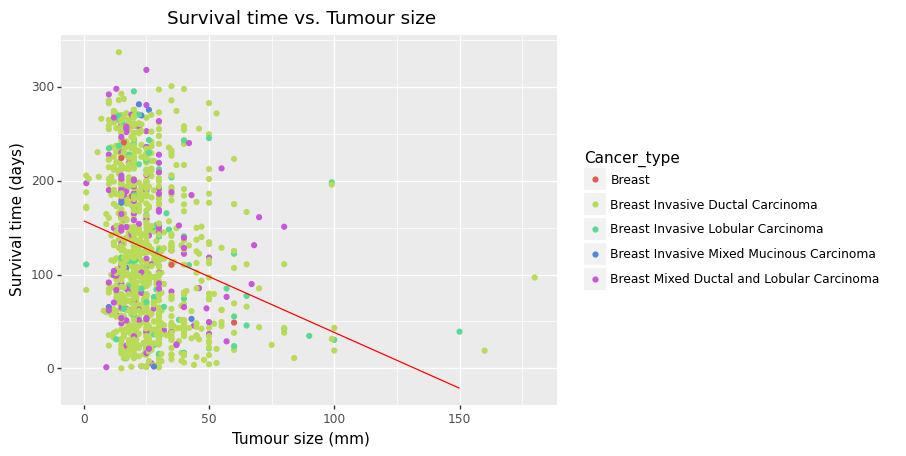

<ggplot: (8767586322209)>

In [ ]:
# Display the results
predictions = pd.DataFrame({'X':X.reshape(-1), 'y_hat': y_hat}) # plotnine works with pd.DataFrame
metabric_p9_plot + p9.geom_line(p9.aes(x='X', y='y_hat'), data=predictions, color='red') # Overlay the regression line on the scatter plot

[(0.0, 350.0),
 Text(0, 0.5, 'Survival time (days)'),
 Text(0.5, 0, 'Tumour size (mm)'),
 Text(0.5, 1.0, 'Survival time vs. Tumour size')]

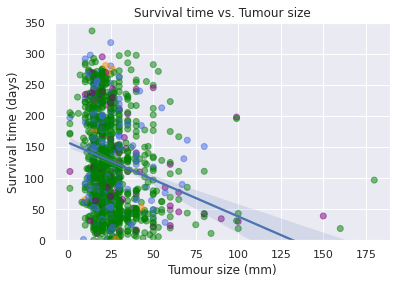

In [ ]:
# alternative visualization with automatic regression visualization, along with the deviation spectrum; quick method to preview data

color_map = tuple(metabric["Cancer_type"].apply(lambda x: {k: v for v, k in zip(['darkorange', 'royalblue', '#555555', 'green', 'purple'],
                                  set(metabric['Cancer_type'].values))}.get(x)))

sns.regplot(data=metabric, # source dataset
            x="Tumour_size", 
            y="Survival_time",
            scatter_kws=dict(alpha=.5,
                             color=color_map)).set(title="Survival time vs. Tumour size",
                          xlabel="Tumour size (mm)",
                          ylabel="Survival time (days)",
                          ylim=(0,350))
                             
# c=95; Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. 
# The confidence interval is estimated using a bootstrap

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X_train, X_test, y_train, y_test = train_test_split(metabric["Tumour_size"],
                                                    metabric["Survival_time"], 
                                                    test_size=.2, 
                                                    random_state=42) # to get repeatable results

lin_reg.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

y_predicted = lin_reg.predict(X_test.to_numpy().reshape(-1,1))

print("MSE:", mean_squared_error(y_test, y_predicted))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, y_predicted)))

# more: https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be

fig = px.scatter(pd.DataFrame(dict(Tumour_size=list(X_test), Survival_time=[item for sublist in y_predicted for item in sublist])), 
                 x="Tumour_size", 
                 y="Survival_time", 
                 title="Survival time vs. Tumour size",
                 labels={"Tumour_size":"Tumour size (mm)",
                             "Survival_time":"Survival time (days)"})
fig.show()

MSE: 5507.957105299054
SQUARE ROOT MSE:  74.21561227463567


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



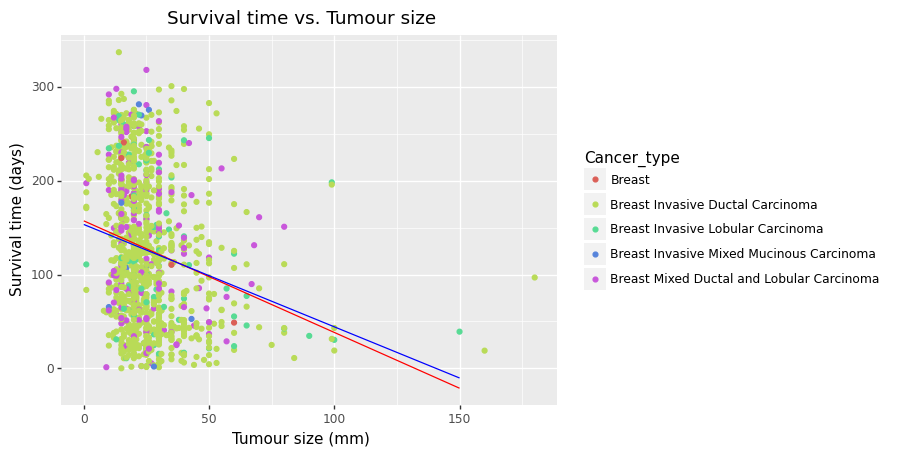

<ggplot: (8767584121789)>

In [ ]:
X = np.linspace(0, 150, 10).reshape(-1,1)
y_hat = lin_reg.predict(X)

predictions_2 = pd.DataFrame({'X':X.reshape(-1), 'y_hat': y_hat.reshape(-1)}) 

(metabric_p9_plot +  # previous visualization recycling
 p9.geom_line(p9.aes(x='X', 
                     y='y_hat'), 
              data=predictions, # full dataset
              color='red') + 
 p9.geom_line(p9.aes(x='X', 
                     y='y_hat'), 
              data=predictions_2, # train dataset
              color='blue'))

## 2. Multivariate linear regression

As with `statsmodels`, we can apply a similar procedure to run the multivariate regression too. This time, however, we need to a little more work with the categorical variables. We'll first do that work using `pandas`, then demonstrate how to use `sklearn` to achieve the same result that will generalise to more complex examples.

We cannot use `linear.LinearRegression` directly because, unlike `statsmodels`, `sklearn` doesn't automatically treat the `str` types in `Cancer_type` ande `ER_status` columns.

First, we convert the `ER_status` to `0.0`s and `1.0`s (i.e. we 'binarize' the variable).

In [ ]:
metabric['ER_status_binary'] = (metabric.ER_status == 'Positive').astype(np.float)

Next, let's 'one-hot-encode' the `Cancer_type`. This is a transformation of a single column of categorical features into an array of binary features, one-per-category, where each row has a single `1.0` ('one-hot') in the column corresponding to the matching category. This is made clearer by example.

In [ ]:
cancer_types = list(metabric.Cancer_type.unique())
cancer_types

['Breast Invasive Ductal Carcinoma',
 'Breast Mixed Ductal and Lobular Carcinoma',
 'Breast Invasive Lobular Carcinoma',
 'Breast Invasive Mixed Mucinous Carcinoma',
 'Breast']

In [ ]:
for cancer_type in cancer_types:
    column_name = 'Cancer_type_' + cancer_type
    metabric[column_name] = (metabric.Cancer_type == cancer_type).astype(np.float)

metabric.columns[metabric.columns.str.startswith("Cancer_type_")].tolist()

['Cancer_type_Breast Invasive Ductal Carcinoma',
 'Cancer_type_Breast Mixed Ductal and Lobular Carcinoma',
 'Cancer_type_Breast Invasive Lobular Carcinoma',
 'Cancer_type_Breast Invasive Mixed Mucinous Carcinoma',
 'Cancer_type_Breast']

In [ ]:
# Define the predictors ('X') and the response ('y')
X = metabric.loc[:, ["ER_status_binary",
                     "Cancer_type_Breast Invasive Ductal Carcinoma",
                     "Cancer_type_Breast Mixed Ductal and Lobular Carcinoma",
                     "Cancer_type_Breast Invasive Lobular Carcinoma",
                     "Cancer_type_Breast Invasive Mixed Mucinous Carcinoma",
                     "Cancer_type_Breast",  
                     "Tumour_size"]]

y = metabric["Survival_time"]

In [ ]:
X.head()

,ER_status_binary,Cancer_type_Breast Invasive Ductal Carcinoma,Cancer_type_Breast Mixed Ductal and Lobular Carcinoma,Cancer_type_Breast Invasive Lobular Carcinoma,Cancer_type_Breast Invasive Mixed Mucinous Carcinoma,Cancer_type_Breast,Tumour_size
1,1.0,1.0,0.0,0.0,0.0,0.0,10.0
4,1.0,0.0,1.0,0.0,0.0,0.0,40.0
5,1.0,1.0,0.0,0.0,0.0,0.0,31.0
8,1.0,1.0,0.0,0.0,0.0,0.0,16.0
9,1.0,0.0,0.0,1.0,0.0,0.0,28.0


In [ ]:
y.head()

1    84.633333
4    41.366667
5     7.800000
8    36.566667
9    36.266667
Name: Survival_time, dtype: float64

In [ ]:
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# Inspect the fit regression coefficients and intercept
lin_reg.intercept_, lin_reg.coef_

(161.8016862086243,
 array([ 13.03538225, -17.57512295,  -7.66583289,  -7.4337667 ,
         -2.07277446,  34.74749699,  -1.16952734]))

You might be thinking that's a lot of extra work compared with the `statsmodels` version. Luckily, `sklearn` has the concepts of `Transformer`s and `Pipeline`s that are built to handle this, and much more complex preprocessing.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = metabric.loc[:, ["ER_status", "Cancer_type", "Tumour_size"]]
y = metabric["Survival_time"]

label_transformer = OneHotEncoder(drop='if_binary')

preprocessor = ColumnTransformer(transformers=[('labels', 
                                                label_transformer, 
                                                ['ER_status', 
                                                 'Cancer_type']),],
                                 remainder='passthrough')

In [ ]:
import sklearn; sklearn.show_versions()


System:
    python: 3.7.12 (default, Sep 10 2021, 00:21:48)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 21.1.3
setuptools: 57.4.0
   sklearn: 0.23.0
     numpy: 1.19.5
     scipy: 1.4.1
    Cython: 0.29.24
    pandas: 1.1.5
matplotlib: 3.2.2
    joblib: 1.0.1

Built with OpenMP: True


In [ ]:
!pip install 'scikit-learn==0.23'

     |████████████████████████████████| 7.3 MB 28.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
preprocessor.fit_transform(X)

array([[ 1.,  0.,  1., ...,  0.,  0., 10.],
       [ 1.,  0.,  0., ...,  0.,  1., 40.],
       [ 1.,  0.,  1., ...,  0.,  0., 31.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0., 20.],
       [ 1.,  0.,  0., ...,  0.,  1., 20.],
       [ 1.,  0.,  0., ...,  1.,  0., 22.]])

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', 
                            preprocessor), 
                           ('model', 
                            lin_reg)])
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('labels',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['ER_status',
                                                   'Cancer_type'])])),
                ('model', LinearRegression())])

In [ ]:
# Inspect the fit regression coefficients and intercept (sanity check - let's ensure we get what we had before!)
pipeline['model'].intercept_, pipeline['model'].coef_

(161.80168620862443,
 array([ 13.03538225,  34.74749699, -17.57512295,  -7.4337667 ,
         -2.07277446,  -7.66583289,  -1.16952734]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', lin_reg)])
pipeline.fit(X_train, y_train)

y_hat = pipeline.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_hat))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, y_hat)))

fig = px.scatter(pd.DataFrame(dict(Tumour_size=list(X_test["Tumour_size"]),
                                   Cancer_type=list(X_test["Cancer_type"]),
                                   Survival_time=y_hat)), 
                 x="Tumour_size", 
                 y="Survival_time", 
                 title="Survival time vs. Tumour size - Multivariate linear regression - Prediction results",
                 color="Cancer_type",
                 labels={"Tumour_size":"Tumour size (mm)",
                         "Survival_time":"Survival time (days)",
                         "Cancer_type":"Cancer type"})
fig.show()

MSE: 5427.077256546542
SQUARE ROOT MSE:  73.6686992999506


As with any regression model, it's instructive to plot a histogram of the residuals. (TL;DR; - it's not exactly very predictive!)

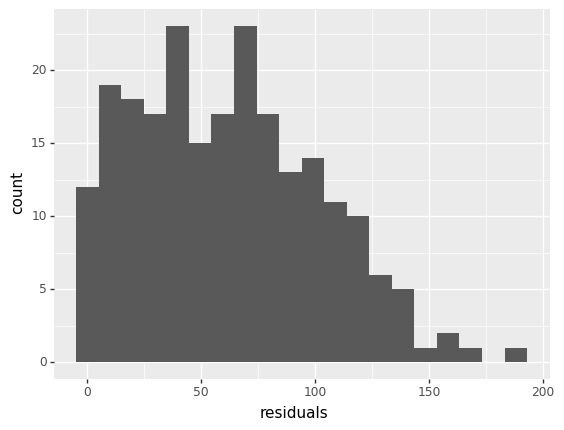

<ggplot: (8767583611225)>

In [ ]:
residuals = pd.DataFrame({'residuals': np.abs(y_test-y_hat)})

# the aes object contains only the variable that will be plotted on the x axis i.e. the one for which we want to generate a distribution
p9.ggplot(residuals, p9.aes('residuals')) + p9.geom_histogram(bins=20)

In [ ]:
fig = px.histogram(residuals, x="residuals", nbins=20)
fig.show()

## 3. Moving beyond linear models

We can work on the US Census Bureau's [1985 Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps/library/publications.1985.html) to investigate how more powerful, non-linear models behave.

In [ ]:
import urllib, os
from sklearn import ensemble

In [ ]:
if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
data = pd.read_csv('wages.txt', 
                   skiprows=27, 
                   skipfooter=6, 
                   sep=None,
                   header=None, 
                   names=['EDUCATION','SOUTH','SEX','EXPERIENCE',
                          'UNION','WAGE','AGE','RACE','OCCUPATION',
                          'SECTOR','MARR'],
                   engine='python')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUCATION   534 non-null    int64  
 1   SOUTH       534 non-null    int64  
 2   SEX         534 non-null    int64  
 3   EXPERIENCE  534 non-null    int64  
 4   UNION       534 non-null    int64  
 5   WAGE        534 non-null    float64
 6   AGE         534 non-null    int64  
 7   RACE        534 non-null    int64  
 8   OCCUPATION  534 non-null    int64  
 9   SECTOR      534 non-null    int64  
 10  MARR        534 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 46.0 KB


In [ ]:
data.describe()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.00000,534.000000,534.000000
mean,13.018727,0.292135,0.458801,17.822097,0.179775,9.024064,36.833333,2.698502,4.14794,0.275281,0.655431
std,2.615373,0.455170,0.498767,12.379710,0.384360,5.139097,11.726573,0.679999,1.65580,0.538453,0.475673
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.00000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,8.000000,0.000000,5.250000,28.000000,3.000000,3.00000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,15.000000,0.000000,7.780000,35.000000,3.000000,4.00000,0.000000,1.000000
75%,15.000000,1.000000,1.000000,26.000000,0.000000,11.250000,44.000000,3.000000,6.00000,0.000000,1.000000
max,18.000000,1.000000,1.000000,55.000000,1.000000,44.500000,64.000000,3.000000,6.00000,2.000000,1.000000


In [ ]:
data.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4.00,22,3,6,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1


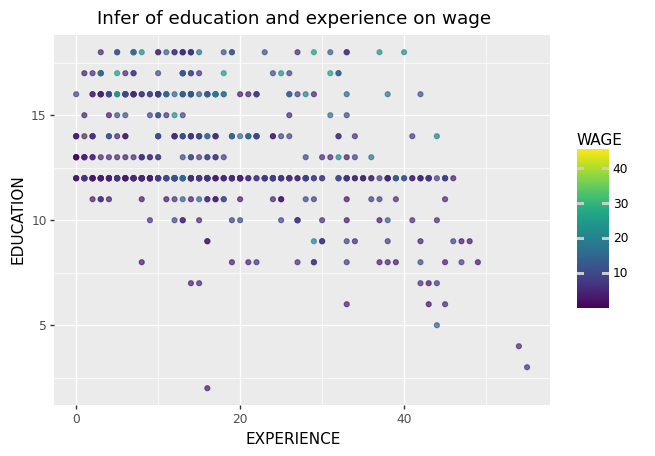

<ggplot: (8767583960161)>

In [ ]:
(p9.ggplot(data, p9.aes("EXPERIENCE", "EDUCATION")) + 
 p9.geom_point(p9.aes(color='WAGE'), alpha=0.7) + 
 p9.ggtitle("Infer of education and experience on wage"))

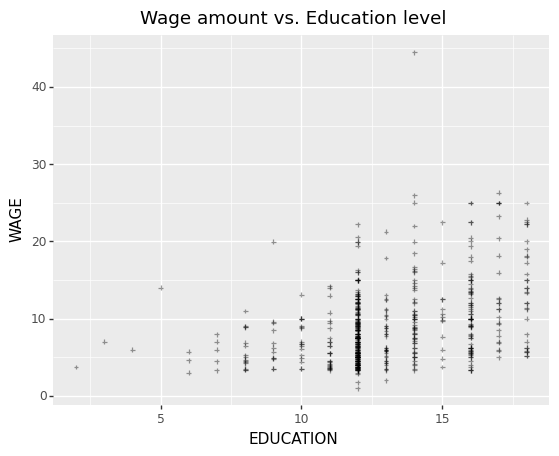

<ggplot: (8767586745901)>

In [ ]:
(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) +
 p9.ggtitle("Wage amount vs. Education level"))

### Decision Trees and Random Forest

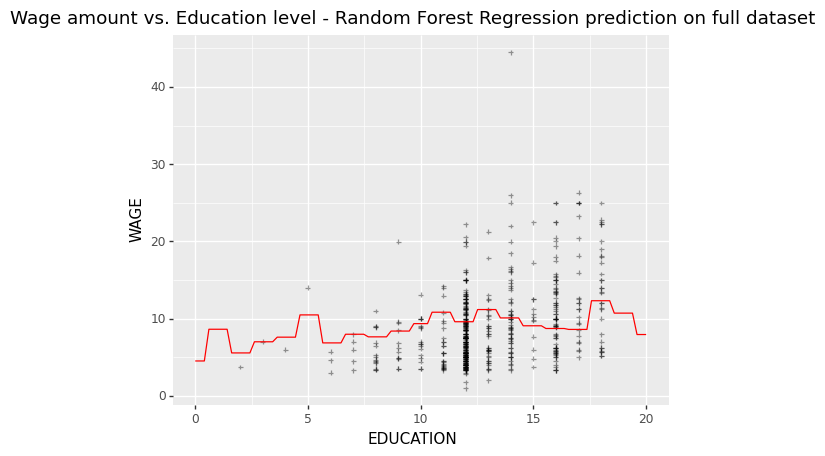

<ggplot: (8767583729973)>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X=data.loc[:,['EXPERIENCE']], 
          y=data['WAGE'])

X = np.linspace(0,20,100).reshape(-1,1)
y_hat = model.predict(X)

predictions = pd.DataFrame({'X': X.reshape(-1), 
                            'y_hat': y_hat}) 

(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', 
                     y='y_hat'), 
              data=predictions, 
              color='red') +
 p9.ggtitle("Wage amount vs. Education level - Random Forest Regression prediction on full dataset"))

In [ ]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 9.50
|   |--- feature_0 <= 0.50
|   |   |--- value: [4.53]
|   |--- feature_0 >  0.50
|   |   |--- feature_0 <= 3.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- value: [8.63]
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- value: [5.57]
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- value: [7.01]
|   |   |--- feature_0 >  3.50
|   |   |   |--- feature_0 <= 5.50
|   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |--- value: [7.61]
|   |   |   |   |--- feature_0 >  4.50
|   |   |   |   |   |--- value: [10.49]
|   |   |   |--- feature_0 >  5.50
|   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |--- value: [6.87]
|   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |--- feature_0 <= 8.50
|   |   |   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |   |   |--- value: [7.99]
|   |   |   |   |   |   |--- feature_0 >  7.50
|   |   |   |   |   |   |   |--- value: [7.65

In [ ]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(model, feature_names='EXPERIENCE', filled=True)

In [ ]:
model = ensemble.RandomForestRegressor()

model.fit(X=data.loc[:,['EXPERIENCE']], 
          y=data['WAGE'])

RandomForestRegressor()

In [ ]:
model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE'])

0.13492913956780894

In [ ]:
X = np.linspace(0,20,100).reshape(-1,1)
y_hat = model.predict(X)

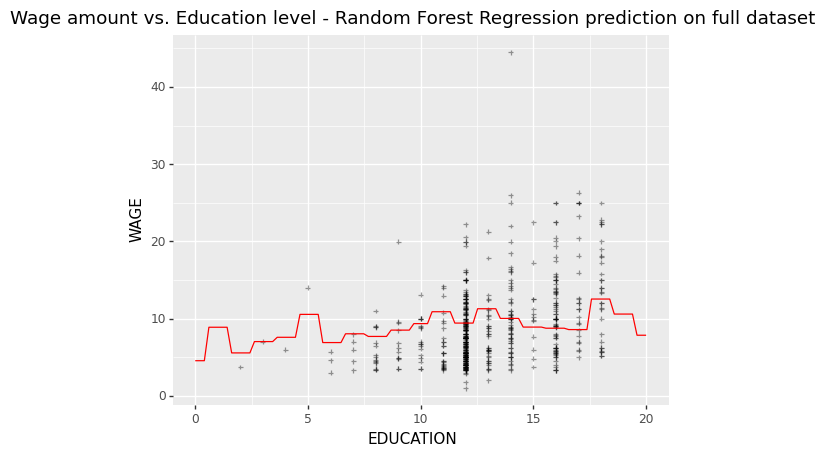

<ggplot: (8767583730109)>

In [ ]:
predictions = pd.DataFrame({'X': X.reshape(-1), 
                            'y_hat': y_hat}) 

(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', 
                     y='y_hat'), 
              data=predictions, 
              color='red') +
 p9.ggtitle("Wage amount vs. Education level - Random Forest Regression prediction on full dataset"))

The fundamental question in machine learning is, 'how wiggly do I make my line?'. One way to assess this is to use a 'holdout' set. We fit the model on some proportion of the available data, and 'hold out' the rest to evaluate how well the model generalises to data it's never previously seen.

In [ ]:
from sklearn.model_selection import train_test_split

wages_train, wages_test = train_test_split(data, test_size=.2)

In [ ]:
model.fit(X=wages_train.loc[:,['EXPERIENCE']], 
          y=wages_train['WAGE'])

RandomForestRegressor()

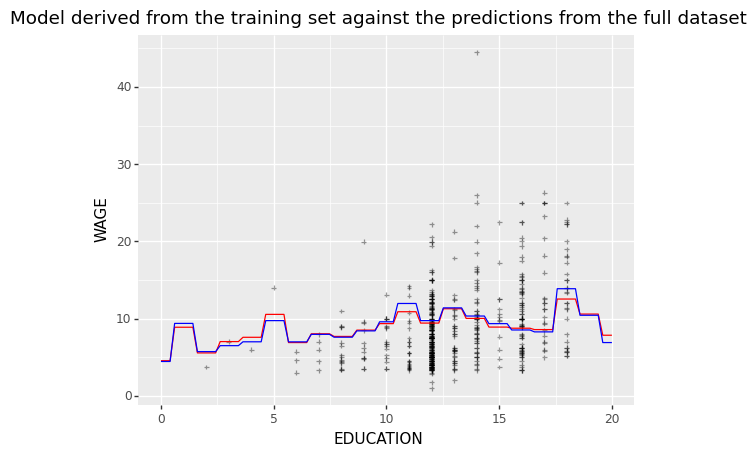

<ggplot: (8767583450709)>

In [ ]:
y_hat_train = model.predict(X)
predictions_train = pd.DataFrame({'X': X.reshape(-1), 'y_hat': y_hat_train}) 

(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions, # full dataset
              color='red') + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions_train, # training dataset
              color='blue') +
 p9.ggtitle("Model derived from the training set against the predictions from the full dataset"))

Now assess the model performance (coefficient of determination R^2 of the prediction) on the test set.

In [ ]:
model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE'])

-0.04760545284202378

If is negative, it means that our model performance is worse than if we just predicted the mean value of `WAGE` for every sample! Compare this to the model performance if evaluated on the dataset used to train it.

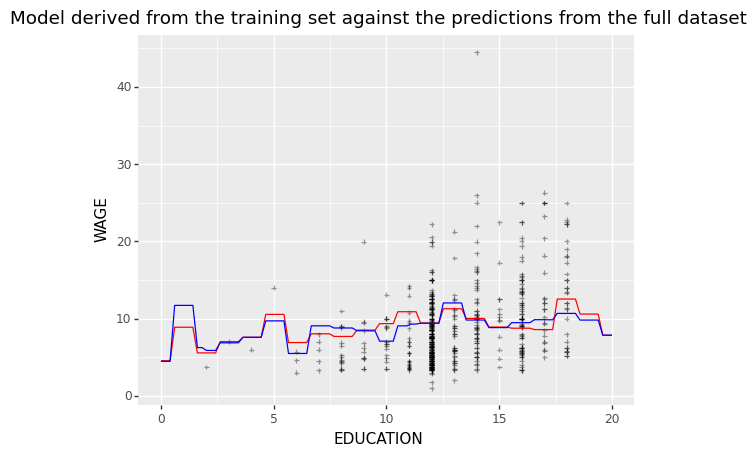

<ggplot: (8767583508369)>

In [ ]:
wages_train, wages_test = train_test_split(data, test_size=.5)
model.fit(X=wages_train.loc[:,['EXPERIENCE']], 
          y=wages_train['WAGE'])
y_hat_train = model.predict(X)
predictions_train = pd.DataFrame({'X': X.reshape(-1), 'y_hat': y_hat_train}) 

(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions, # full dataset
              color='red') + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions_train, # training dataset
              color='blue') +
 p9.ggtitle("Model derived from the training set against the predictions from the full dataset"))

In [ ]:
print("SCORE:", model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE']))

SCORE: -0.026946434184173862


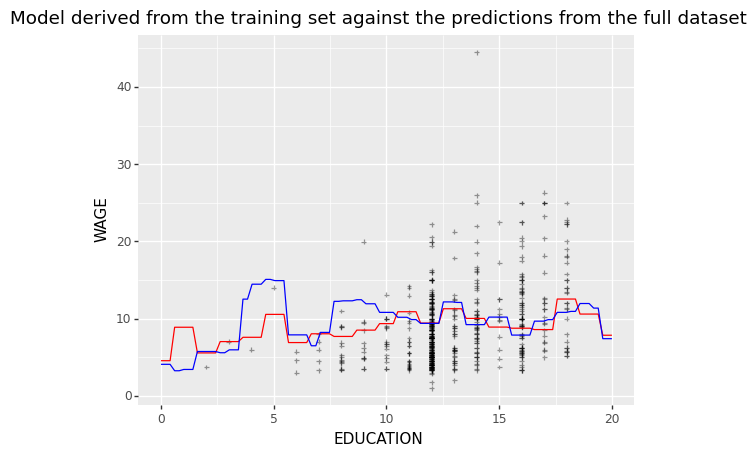

<ggplot: (8767583741201)>

In [ ]:
wages_train, wages_test = train_test_split(data, test_size=.8)
model.fit(X=wages_train.loc[:,['EXPERIENCE']], 
          y=wages_train['WAGE'])
y_hat_train = model.predict(X)
predictions_train = pd.DataFrame({'X': X.reshape(-1), 'y_hat': y_hat_train}) 

(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions, # full dataset
              color='red') + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions_train, # training dataset
              color='blue') +
 p9.ggtitle("Model derived from the training set against the predictions from the full dataset"))

In [ ]:
print("SCORE:", model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE']))

SCORE: -0.17517725794104444


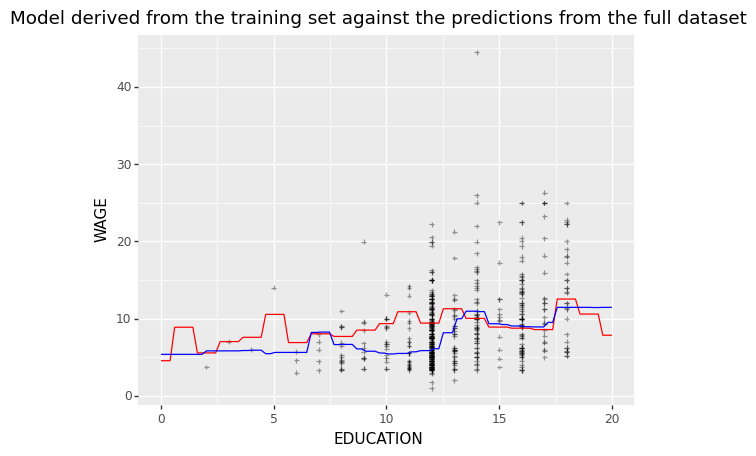

<ggplot: (8767583886457)>

In [ ]:
wages_train, wages_test = train_test_split(data, test_size=.95)
model.fit(X=wages_train.loc[:,['EXPERIENCE']], 
          y=wages_train['WAGE'])
y_hat_train = model.predict(X)
predictions_train = pd.DataFrame({'X': X.reshape(-1), 'y_hat': y_hat_train}) 

(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions, # full dataset
              color='red') + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions_train, # training dataset
              color='blue') +
 p9.ggtitle("Model derived from the training set against the predictions from the full dataset"))

In [ ]:
print("SCORE:", model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE']))

SCORE: -0.13326810479397366


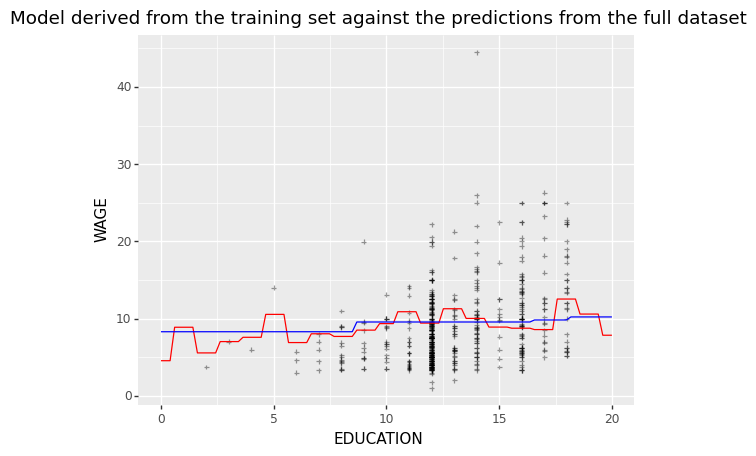

<ggplot: (8767586445589)>

In [ ]:
wages_train, wages_test = train_test_split(data, test_size=.99)
model.fit(X=wages_train.loc[:,['EXPERIENCE']], 
          y=wages_train['WAGE'])
y_hat_train = model.predict(X)
predictions_train = pd.DataFrame({'X': X.reshape(-1), 'y_hat': y_hat_train}) 

(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions, # full dataset
              color='red') + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions_train, # training dataset
              color='blue') +
 p9.ggtitle("Model derived from the training set against the predictions from the full dataset"))

In [ ]:
print("SCORE:", model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE']))

SCORE: 0.023123880410006792


### Extending to multivariate models

As we did with the linear regression, we can extend the RandomForestRegressor to work with more than one predictor variable. Let's see how good our model is when we include `EXPERIENCE` alongside `EDUCATION`.

In [ ]:
model = ensemble.RandomForestRegressor()
model.fit(X=wages_train.loc[:,['EXPERIENCE', 'EDUCATION']], y=wages_train['WAGE'])

RandomForestRegressor()

In [ ]:
ed_min, ed_max = data.EDUCATION.min(), data.EDUCATION.max()
ex_min, ex_max = data.EXPERIENCE.min(), data.EXPERIENCE.max()

In [ ]:
grid = np.mgrid[ex_min - 1:ex_max + 1:100j, ed_min - 1:ed_max + 1:100j]
X = grid.reshape((2, -1)).T
prediction = model.predict(X)
prediction = np.reshape(prediction, (100, 100))

In [ ]:
model.score(X=wages_test.loc[:,['EXPERIENCE', 'EDUCATION']], y=wages_test['WAGE'])

0.05940518782364379

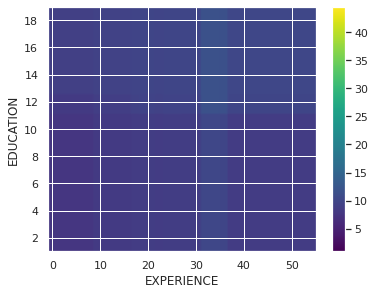

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot()
ax.set_ylabel('EDUCATION')
ax.set_xlabel('EXPERIENCE')
wage_min, wage_max = data.WAGE.min(), data.WAGE.max()
wages_plot = ax.imshow(
    np.rot90(prediction),
    vmin=wage_min,
    vmax=wage_max,
    aspect='auto',
    extent=(ex_min - 1, ex_max, ed_min -1, ed_max + 1),
    cmap=plt.cm.viridis)

fig.colorbar(wages_plot, ax=ax)

This is an example of 'overfitting' the training set - the model has learned to approximate the noise in our training set, rather than learning to extrapolate or interpolate in a way that generalises to samples it has not seen before.

# Exercises

We will work with the built-in `sklearn.datasets` diabetes dataset.

This dataset comprises 442 diabetes patients, each with ten baseline predictors: age, sex, body mass index, average blood pressure, and six blood serum measurements. The response variable is measure of disease progression one year after baseline. (Note that it is not neccessary to transform any of these variables prior to training the model - everything is all ready to go straight into `sklearn`.)

In [ ]:
from sklearn import datasets
diabetes_dataset = datasets.load_diabetes()
predictors = pd.DataFrame(data=diabetes_dataset.data, columns=diabetes_dataset.feature_names)
response = diabetes_dataset.target

predictors.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Exercise 1

Using sklearn, fit a multivariate linear regression using all 442 samples to predict the response variable. Use all 10 predictors, and also score your model using predictions on all 442 samples.

### Exercise 2

Do a test-train split, and run _Exercise 1_ again, this time fitting your model with the training set, and scoring it both with the test set and with the training set.

### Exercise 3

As with Exercise 2, but this time try using the default [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) instead. How do your results compare? Try just using one or two predictors.

### Exercise 4

Dive into the documentation of [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and try tweaking some of the _hyperparameters_ to see how this affects your model score on the training and test datasets ('n_estimators' and 'max_depth' are good places to start). If you want do delve deeper this [blog post](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) is a nice introduction to the concepts of _cross-validation_ and _hyperparameter tuning_ (more on this next week though!).

### Exercise 5
Find definitions and learn basic jargon words and concepts:
- probability
- bayes theorem
- mean
- median
- regression
- classification
- clustering
- features
- attributes
- parts of data set division
- labels
- hyperparameters
- overfitting
- underfitting
- dev set
- ROC curve
- data mining
- AI
- Bayes theorem
- pattern recognition/statistics, 
- unsupervised vs. supervised learning, 
- train/test split, 
- bias/variance tradeoff (generalisability)
- regularisaton
- loss function
- Turing Test
- bootstrap